# Comparison of microscopic and macroscopic results in terms of the unified trajectory

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
micro_data = pd.read_pickle('../divestdata/P3/micro/unified_trajectory')
macro_data = pd.read_pickle('../divestdata/P3/aggregate/unified_trajectory')
macro_data.index.levels

FrozenList([[1.0, 1.25, 1.5], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.1, 0.316227766017, 1.0, 3.16227766017, 10.0, 31.6227766017, 100.0, 316.227766017, 1000.0], [0.05], [0.0, 5.05050505051, 10.101010101, 15.1515151515, 20.202020202, 25.2525252525, 30.303030303, 35.3535353535, 40.404040404, 45.4545454545, 50.5050505051, 55.5555555556, 60.6060606061, 65.6565656566, 70.7070707071, 75.7575757576, 80.8080808081, 85.8585858586, 90.9090909091, 95.9595959596, 101.01010101, 106.060606061, 111.111111111, 116.161616162, 121.212121212, 126.262626263, 131.313131313, 136.363636364, 141.414141414, 146.464646465, 151.515151515, 156.565656566, 161.616161616, 166.666666667, 171.717171717, 176.767676768, 181.818181818, 186.868686869, 191.919191919, 196.96969697, 202.02020202, 207.070707071, 212.121212121, 217.171717172, 222.222222222, 227.272727273, 232.323232323, 237.373737374, 242.424242424, 247.474747475, 252.525252525, 257.575757576, 262.626262626, 267.676767677, 272.727272727, 27

In [7]:
key = [1.25, 0.5, 1.0, 0.05]
level = ['b_d', 'phi', 'tau', 'eps']

tmax = 500

mean = micro_data.xs(level = level, key=key)['mean_trajectory'].unstack('observables')[0:tmax]
sem = micro_data.xs(level = level, key=key)['sem_trajectory'].unstack('observables')[0:tmax]


ma_mean = macro_data.xs(level = level, key=key)['mean_trajectory'].unstack('observables')[0:tmax]
ma_sem = macro_data.xs(level = level, key=key)['sem_trajectory'].unstack('observables')[0:tmax]


for i, df in enumerate([mean, sem, ma_mean, ma_sem]):
    
    columns = df.columns
    new_columns = pd.Index(['$'+col+'$' for col in columns.values], name=columns.name)
    df.columns = new_columns

def plot_var(name, mean, sem, ax, color, style, legend=True):
    
    t = mean.index.values
    m = mean[name].values
    s = sem[name].values
    
    if legend is False:
        name = '__no_label__'
    ln = ax.plot(t, m, style, color=color, label=name)
    ax.fill_between(t, m+s, m-s, alpha=.2, color=color)
    
    return ln

def legend_surrogates(styles, pos, ax):
    
    lns = []
    
    for name, style  in styles.items():
        ln = ax.plot(pos[0], pos[1], style, color='k', alpha=.5, label=name)
        lns += ln
        
    return lns

[<matplotlib.lines.Line2D object at 0x7fbb47d6f048>, <matplotlib.lines.Line2D object at 0x7fbb4808c710>, <matplotlib.lines.Line2D object at 0x7fbb47d23f28>, <matplotlib.lines.Line2D object at 0x7fbb4203d128>]


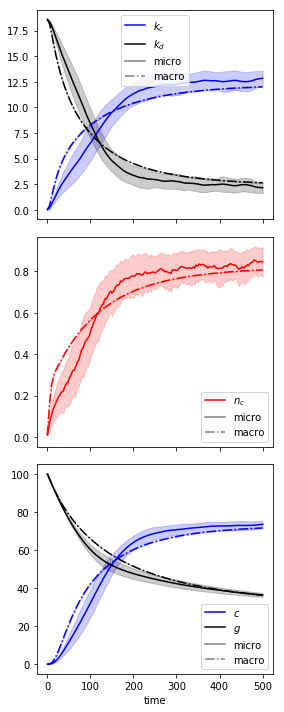

In [14]:
styles = {'micro': '-',
          '': '-.'}

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(221)
plot_var('$k_c$', mean, sem, ax1, 'b', '-')
plot_var('$k_d$', mean, sem, ax1, 'k', '-')

plot_var('$k_c$', ma_mean, ma_sem, ax1, 'b', '-.', legend=False)
plot_var('$k_d$', ma_mean, ma_sem, ax1, 'k', '-.', legend=False)

ax1.set_xticklabels([])
legend_surrogates(styles, [0, 0], ax1)
plt.legend()

ax2 = fig.add_subplot(222)
plot_var('$n_c$', mean, sem, ax2, 'r', '-')
plot_var('$n_c$', ma_mean, ma_sem, ax2, 'r', '-.', legend=False)

legend_surrogates(styles, [0, 0], ax2)
ax2.set_xticklabels([])
plt.legend(loc='lower right')

ax3 = fig.add_subplot(223)
#ax3b = ax3.twinx()
plot_var('$c$', ma_mean, ma_sem, ax3, 'b', '-.', legend=False)
plot_var('$g$', ma_mean, ma_sem, ax3, 'k', '-.', legend=False)

ln1 = plot_var('$c$', mean, sem, ax3, 'b', '-')
ln2 = plot_var('$g$', mean, sem, ax3, 'k', '-')

lns = legend_surrogates(styles, [0, 0], ax3)

lns = ln1 + ln2 + lns
print(lns)
labs = [ln.get_label() for ln in lns]

plt.legend(lns, labs, loc='lower right')

ax3.set_xlabel('time')

ax4 = fig.add_subplot(224)
plot_var('$r_c$', mean, sem, ax4, 'b', '-')
plot_var('$r_d$', mean, sem, ax4, 'k', '-')

plot_var('$r_c$', ma_mean, ma_sem, ax4, 'b', '-.', legend=False)
plot_var('$r_d$', ma_mean, ma_sem, ax4, 'k', '-.', legend=False)

legend_surrogates(styles, [0, 0], ax4)
plt.legend()
ax4.set_xlabel('time')

fig.tight_layout()
plt.savefig('micro_vs_rep.pdf')